#### 1 - Data preprocessing and Data wrangling:
     - Use pivoting to convert multi-class, multi-label data into multi-label, binary class data
     
#### 2 - Data split - Use train-split / k-fold crsoss validation / stratified(balanced) shuffle split:
     - Have single training/testing dataset.
     
#### 3 - Use OneVsRestClassifier to solve multi-label data by wrapping these algorithms like LinearSVM or Naive Bayes.
    - Tf-Idf vectorizer to convert the string in to numeric value - have appropriate parameters set.
    - english stop_words from english Corpus
    - Parameter tunning through GridSearchCV

#### 4 - Model Evaluation 
    - Use precision, recall and f1 score to evaluate the model.
    - Accuracy is not suited measure in multilabel scenario

### 1 - Data preprocessing and data wrangling 

In [17]:
import pandas as pd

df = pd.read_excel(open('c:\data\multi-label-data.xlsx','rb'))

In [18]:
#def clean_words(data_):
    
#    return data_

In [19]:
data_ = df["Detailed Description"].str.replace('.*@+.*', ' ')
data_ = data_.str.replace('\t',' ')
data_ = data_.str.replace(',',' ')
data_ = data_.str.replace(':',' ')
data_ = data_.str.replace(';',' ')
data_ = data_.str.replace('=',' ')
data_ = data_.str.replace('\x08','\\b') # \b is being treated as backspace
data_ = data_.str.replace('_',' ')
data_ = data_.str.replace('(',' ')
data_ = data_.str.replace(')',' ')
data_ = data_.str.replace('+',' ')
data_ = data_.str.replace('-',' ')
data_ = data_.str.replace('`',' ')
data_ = data_.str.replace('\'',' ')
data_ = data_.str.replace('.',' ')
data_ = data_.str.replace('//',' ')
data_ = data_.str.replace('\\',' ')
data_ = data_.str.replace('/',' ')
data_ = data_.str.replace('_',' ')
data_ = data_.str.replace('"',' ')
data_ = data_.str.replace('\r\n', ' ')
data_ = data_.str.replace('\n', ' ')
data_ = data_.str.replace('*', ' ')
data_ = data_.str.replace('-', ' ')
data_ = data_.str.replace('#', ' ')
data_ = data_.str.replace('\s+', ' ')
data_ = data_.str.replace('=', ' ')
data_ = data_.str.replace('_', ' ')
data_ = data_.str.replace('>', ' ')
data_ = data_.str.replace('\n\t\r', ' ')
data_ = data_.str.replace('  ', ' ')
data_ = data_.str.replace(',', ' ')
data_

0        Potential vtrack payment duplication Darwin r...
1        Workgroup Set Up Document Vodafone xlsx Can y...
2        Darwin e mail account HI Please can you inves...
3        URGENT Link emails to Darwin Can you please a...
4        New email Account Can you please arrange for ...
5        Payment report error Good morning There is a ...
6        Messagenet access Can you please ensure that ...
7        FW Afternoon Attached are forms in relation t...
8        CameraCat software not working In NZ we use s...
9        Darwin claim 6244854 Payment messaging issue ...
10       Broken job please manually close 400048001 Go...
11       First report service standard prompt Insurer ...
12       Payment Inquiry Munoz Inv 16 0165 Please let ...
13       Re removal of actions Hi please remove the fo...
14       Trigger for Darwin Access Rebekah Mittoo Staf...
15       Service Standard Request for Lian Smith Initi...
16      Message from RNP0026736E97C5 This E mail was s...
17       Trigg

In [20]:
data_1 = df["Categorization"].str.replace('.*@+.*', ' ')
data_1 = data_1.str.replace(':', ' ')
data_1 = data_1.str.replace(',', ' ')

In [21]:
data_2 = df["Configuration item"].str.replace('.*@+.*', ' ')
data_2 = data_2.str.replace(':', ' ')
data_2 = data_2.str.replace(',', ' ')

In [22]:
df["Detailed Description"] = data_
df["Categorization"] = data_1
df["Configuration item"] = data_2

In [23]:
df.columns = ['category', 'config_item', 'description']

In [24]:
##xx= df.category.unique().tolist()
##yy = df.config_item.unique()
##xx

In [25]:
#df["description"] = df["Detailed Description"]
#df = df.drop(["Detailed Description"], axis=1)

#df["category"] = df["Categorization"]
#df = df.drop(["Categorization"], axis=1)

#df["config_item"] = df["Configuration item"]
#df = df.drop(["Configuration item"], axis=1)
#df
#df.to_csv("c:\\data\\full_dataset_clean.csv", sep=',', encoding='utf-8')

In [26]:
#type(df)
#df.values.tolist()
x = df["description"].values.tolist()
y = df.drop(["description"], axis = 1) #remaining 2 columns are in here
y = y.values.tolist()
y

[['Darwin', 'Darwin'],
 ['Darwin', 'Darwin'],
 ['Darwin', 'Darwin'],
 ['Access', 'Darwin'],
 ['Access', 'Darwin'],
 ['Error', 'Darwin'],
 ['Access', 'ClaimFlow'],
 ['ACCOUNTS PAYABLE(P2P)', 'Finance and Accounting'],
 ['Error', 'ClaimFlow'],
 ['Error', 'Darwin'],
 ['Delete', 'ClaimFlow'],
 ['Functionality', 'ClaimFlow'],
 ['ACCOUNTS PAYABLE(P2P)', 'Finance and Accounting'],
 ['Modify', 'ClaimFlow'],
 ['Access', 'Darwin'],
 ['Modify', 'ClaimFlow'],
 ['Modify', 'Finance and Accounting'],
 ['Access', 'Darwin'],
 ['Modify', 'Darwin'],
 ['Access', 'Darwin'],
 ['Functionality', 'ClaimFlow'],
 ['Error', 'Darwin'],
 ['Modify', 'Darwin'],
 ['Access', 'ClaimFlow'],
 ['Transactional', 'Finance and Accounting'],
 ['ACCOUNTS PAYABLE(P2P)', 'Finance and Accounting'],
 ['Modify', 'ClaimFlow'],
 ['Transactional', 'Finance and Accounting'],
 ['ACCOUNTS PAYABLE(P2P)', 'Finance and Accounting'],
 ['ACCOUNTS PAYABLE(P2P)', 'Finance and Accounting'],
 ['Functionality', 'ClaimFlow'],
 ['Modify', 'Darwin'],


In [27]:
# converting all categories in to column and marking it as 1 in the matrix

In [28]:
from sklearn.preprocessing import MultiLabelBinarizer

# convert labels to binary forms (similar to pivot) 
mlb = MultiLabelBinarizer()
y_enc = mlb.fit_transform(y)

In [29]:
df_plot = pd.DataFrame(y_enc) 
df_plot["description"] = x
df_plot

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,description
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Potential vtrack payment duplication Darwin r...
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Workgroup Set Up Document Vodafone xlsx Can y...
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Darwin e mail account HI Please can you inves...
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,URGENT Link emails to Darwin Can you please a...
4,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,New email Account Can you please arrange for ...
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Payment report error Good morning There is a ...
6,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Messagenet access Can you please ensure that ...
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,FW Afternoon Attached are forms in relation t...
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,CameraCat software not working In NZ we use s...
9,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Darwin claim 6244854 Payment messaging issue ...


In [30]:
counts = []
cats = list(df_plot.columns.values)
cats.remove("description")
#cats
for i in cats:
  counts.append((i, df_plot[i].sum()))
df_stats = pd.DataFrame(counts, columns=['category', '#count'])
#df_stats

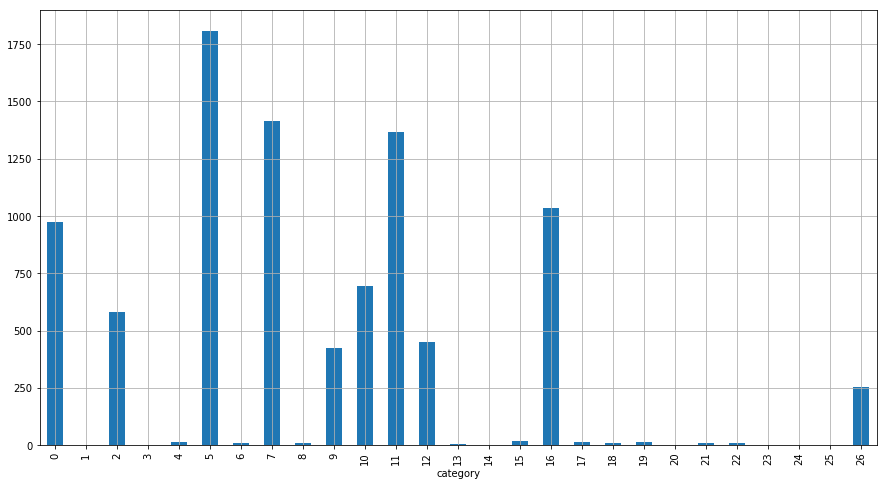

In [31]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

df_stats.plot(x='category', y='#count', kind='bar', legend=False, grid=True, figsize=(15, 8))

### 2 - Split the data into test and train test

In [32]:
from sklearn.cross_validation import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y_enc, test_size=0.33)

# introduce k-fold cross validation for better utilization of the data

C:\Users\ramesha.c.gowda\AppData\Local\python\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Introduce NLTK to remove stopwords and tokenization 

In [33]:
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation

stemmer = PorterStemmer()

stop_words = set(stopwords.words('english') + list(punctuation))

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

Text data needs to be transformed into numerical form. this can be done through TF - IDF

In [34]:
vectorizer = TfidfVectorizer(stop_words=stop_words,
                             tokenizer=tokenize)

In [35]:
#from sklearn.feature_extraction.text import CountVectorizer
#vect = CountVectorizer()


In [36]:
# train_x_vct = vect.fit_transform(train_x)
# test_x_vct = vect.transform(test_x)

train_x_vct = vectorizer.fit_transform(train_x)
test_x_vct = vectorizer.transform(test_x)


### 3 - model selection - Train data and predict 

In [37]:
# from sklearn.svm import SVC
# clf = OneVsRestClassifier(SVC(probability=True))
# clf.fit(train_x_vct, train_y)

In [38]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression

classifier = OneVsRestClassifier(LinearSVC(random_state=42))
# classifier = OneVsRestClassifier(LogisticRegression(random_state=42))
# classifier = OneVsRestClassifier(RandomForestClassifier())
classifier.fit(train_x_vct, train_y)

C:\Users\ramesha.c.gowda\AppData\Local\python\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 1 is present in all training examples.
  str(classes[c]))
C:\Users\ramesha.c.gowda\AppData\Local\python\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 20 is present in all training examples.
  str(classes[c]))
C:\Users\ramesha.c.gowda\AppData\Local\python\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 24 is present in all training examples.
  str(classes[c]))


OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0),
          n_jobs=1)

In [39]:
predictions = classifier.predict(test_x_vct)
predictions

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [40]:
test_y

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### 4 - Evaluate the model




In [41]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

precision = precision_score(test_y, predictions, average='micro')
recall = recall_score(test_y, predictions, average='micro')
f1 = f1_score(test_y, predictions, average="micro") 
 
print("Micro-average quality numbers")
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("f1-score: ", f1)

# precision not to be considered
#print("Accuracy Score: ",accuracy_score(test_y, predictions))

Micro-average quality numbers
Precision Score:  0.838363780778
Recall Score:  0.700398142004
f1-score:  0.763195950832


We can try these options to improve the predictions -
1. Have sophisticated NLP technique to remove unwanted to text, symbols, whitespaces, digits etc
2. Try k-fold cross validation / stratified shuffle split to better utilize the data
3. Train data with different algoritms and compare results. 

### Below is the slite different to above approach -
It uses parameter tuning using GridSearchCV

In [61]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

classifier = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words)),('clf', OneVsRestClassifier(LinearSVC()))])
parameters = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    "clf__estimator__C": [0.01, 0.1, 1],
    "clf__estimator__class_weight": ['balanced', None],
}

In [62]:
from sklearn.model_selection import GridSearchCV

grid_search_tune = GridSearchCV(classifier, parameters, cv=2, n_jobs=2, verbose=3)
grid_search_tune.fit(train_x, train_y)

Fitting 2 folds for each of 54 candidates, totalling 108 fits


[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   22.0s
[Parallel(n_jobs=2)]: Done 108 out of 108 | elapsed:  1.5min finished
C:\Users\ramesha.c.gowda\AppData\Local\python\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 1 is present in all training examples.
  str(classes[c]))
C:\Users\ramesha.c.gowda\AppData\Local\python\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 20 is present in all training examples.
  str(classes[c]))
C:\Users\ramesha.c.gowda\AppData\Local\python\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 23 is present in all training examples.
  str(classes[c]))


GridSearchCV(cv=2, error_score='raise',
       estimator=Pipeline(steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...lti_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
          n_jobs=1))]),
       fit_params={}, iid=True, n_jobs=2,
       param_grid={'tfidf__max_df': (0.25, 0.5, 0.75), 'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)], 'clf__estimator__C': [0.01, 0.1, 1], 'clf__estimator__class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [63]:
print("Best parameters set:")
print()
print(grid_search_tune.best_estimator_.steps)
print()

Best parameters set:

[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.25, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words={'such', 'shouldn', 'there', 'until', 'from', 'they', 'only', '(', 'very', 'of', 'where', 'out', 'your', '*', 'an', '\\', '%', '!', 'haven', 'or', 'and', 'shan', ',', '#', 'weren', 'ours', 'him', 'its', 'mightn', '}', '~', 'be', 'are', 'yours', 'ain', "'", 'myself', 'it', 'his', '_', '&',... 'off', 'here', 'now', ';', 'isn', 'at', 've', 're', 'nor', '[', 'to', '>', 'before', 'while', 'll'},
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)), ('clf', OneVsRestClassifier(estimator=LinearSVC(C=1, class_weight='balanced', dual=True, fit_intercept=True,
     intercept

In [64]:
# measuring performance on test set

best_clf = grid_search_tune.best_estimator_
predictions = best_clf.predict(test_x)

In [65]:
#print(predictions)
#print(test_y)

In [66]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
#precision = precision_score(test_y, predictions)
#recall = recall_score(test_y, predictions)
print("Micro-average quality numbers")
print("-----------------------------")
print("f1-score : ",f1_score(test_y, predictions, average="micro"))
print("precision: ",precision_score(test_y, predictions, average="micro"))
print("recall   : ",recall_score(test_y, predictions, average="micro"))
print()
print("Micro-average quality numbers")
print("-----------------------------")
print("f1-score : ",f1_score(test_y, predictions, average="macro"))
print("precision: ",precision_score(test_y, predictions, average="macro"))
print("recall   : ",recall_score(test_y, predictions, average="macro"))

Micro-average quality numbers
-----------------------------
f1-score :  0.76975832789
precision:  0.757147446193
recall   :  0.782796413152

Micro-average quality numbers
-----------------------------
f1-score :  0.270191244029
precision:  0.290642079473
recall   :  0.273979849846


C:\Users\ramesha.c.gowda\AppData\Local\python\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ramesha.c.gowda\AppData\Local\python\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ramesha.c.gowda\AppData\Local\python\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ramesha.c.gowda\AppData\Local\python\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
